In [1]:
import pandas as pd
import fsrs_optimizer

timezone = "Asia/Shanghai"
next_day_starts_at = 4
revlog_start_date = "2006-10-05"  # YYYY-MM-DD
filter_out_suspended_cards = False
filter_out_flags = []

In [2]:
optimizer = fsrs_optimizer.Optimizer()
optimizer.anki_extract(
    "./ALL__Archive.apkg", filter_out_suspended_cards, filter_out_flags
)
analysis = optimizer.create_time_series(timezone, revlog_start_date, next_day_starts_at)
print(analysis)
S0_dataset_group_1 = optimizer.S0_dataset_group.copy()
df1 = pd.read_csv(
    "revlog_history.tsv",
    sep="\t",
    index_col=None,
    dtype={"r_history": str, "t_history": str},
)
print(df1.shape)

Deck file extracted successfully!
revlog.csv saved.


  0%|          | 0/4879 [00:00<?, ?it/s]

Trainset saved.
Retention calculated.


  0%|          | 0/7048 [00:00<?, ?it/s]

Stability calculated.


analysis:   0%|          | 0/235 [00:00<?, ?it/s]

Analysis saved!
1:again, 2:hard, 3:good, 4:easy
first_rating  i         r_history  avg_interval  avg_retention  stability  factor  group_cnt
           1  2           (1,3,3)           1.0          0.895        1.0     inf        366
           1  3         (1,3,3),3           3.1          0.921        4.2    4.20        306
           1  4       (1,3,3),3,3           7.6          0.951       15.9    3.79        244
           1  5     (1,3,3),3,3,3          18.5          0.858       13.9    0.87        163
           3  2               (3)           1.0          0.971        3.8     inf        170
           3  2             (3,3)           1.0          0.972        4.3     inf       1364
           3  2           (3,3,3)           1.0          0.990       13.4     inf        112
           3  3             (3),3           1.0          0.917        1.5    0.39        146
           3  3           (3,3),3           3.1          0.968       11.2    2.60       1231
           3  4       

In [3]:
optimizer = fsrs_optimizer.Optimizer()
optimizer.anki_extract(
    "./ALL__Learning.apkg", filter_out_suspended_cards, filter_out_flags
)
optimizer.create_time_series(
    timezone, revlog_start_date, next_day_starts_at, analysis=False
)
S0_dataset_group_2 = optimizer.S0_dataset_group.copy()
df2 = pd.read_csv(
    "revlog_history.tsv",
    sep="\t",
    index_col=None,
    dtype={"r_history": str, "t_history": str},
)
print(df2.shape)

Deck file extracted successfully!
revlog.csv saved.


  0%|          | 0/5459 [00:00<?, ?it/s]

Trainset saved.
(65224, 12)


In [4]:
optimizer.define_model()
optimizer.S0_dataset_group = S0_dataset_group_1
optimizer.pretrain(dataset=df1.copy(), verbose=False)
optimizer.train(verbose=False)
df1 = optimizer.dataset.copy()
w1 = optimizer.w

  0%|          | 0/28850 [00:00<?, ?it/s]

In [5]:
optimizer.define_model()
optimizer.S0_dataset_group = S0_dataset_group_2
optimizer.pretrain(df2.copy(), verbose=False)
optimizer.train(verbose=False)
df2 = optimizer.dataset.copy()
w2 = optimizer.w

  0%|          | 0/59765 [00:00<?, ?it/s]

In [6]:
optimizer.define_model()
optimizer.S0_dataset_group = pd.concat(
    [S0_dataset_group_1, S0_dataset_group_2])
optimizer.pretrain(pd.concat([df1, df2]), verbose=False)
optimizer.train(verbose=False)
df3 = optimizer.dataset.copy()
w3 = optimizer.w

  0%|          | 0/88615 [00:00<?, ?it/s]

In [7]:
print(w1, w2, w3, sep="\n")
print(df1.shape, df2.shape, df3.shape, sep="\n")

[1.1069, 0.6665, 4.7912, 10.5835, 7.2017, 0.7163, 0.6152, 0.0004, 1.4494, 0.1115, 0.9849, 2.0454, 0.075, 0.4066, 2.8818, 0.0032, 3.4926, 0.0624, 0.255]
[1.0573, 2.6479, 8.6712, 14.1355, 8.4269, 0.4641, 0.6465, 0.0037, 1.38, 0.103, 0.874, 2.3752, 0.0133, 0.2965, 1.1719, 0.0, 3.2663, 0.1734, 0.5962]
[1.1385, 1.4461, 8.0259, 12.9781, 7.9718, 0.4982, 0.8071, 0.0031, 1.3608, 0.1176, 0.9269, 2.6087, 0.01, 0.2975, 0.8956, 0.0, 3.5188, 0.0939, 0.5372]
(28850, 14)
(59765, 14)
(88615, 14)


log loss: 0.2997
RMSE(bins): 0.0220
R-squared: 0.9830
MAE: 0.0042
ICI: 0.0024
E50: 0.0014
E90: 0.0065
EMax: 0.1082
[0.03040424 0.96472896]

Last rating: 1
RMSE(bins): 0.0392
R-squared: 0.6479
MAE: 0.0222
ICI: 0.0208
E50: 0.0191
E90: 0.0276
EMax: 0.3896
[0.2354331 0.7226107]

Last rating: 2
RMSE(bins): 0.0654
R-squared: 0.6967
MAE: 0.0443
ICI: 0.0417
E50: 0.0456
E90: 0.0531
EMax: 0.0542
[-0.03714631  0.9938143 ]

Last rating: 3
RMSE(bins): 0.0243
R-squared: 0.9758
MAE: 0.0079
ICI: 0.0059
E50: 0.0069
E90: 0.0095
EMax: 0.0417
[0.02141568 0.98151703]

Last rating: 4
RMSE(bins): 0.0319
R-squared: 0.5724
MAE: 0.0111
ICI: 0.0093
E50: 0.0086
E90: 0.0151
EMax: 0.0717
[0.26285535 0.72731204]


({'R-squared': 0.9829512587387934,
  'MAE': 0.004196663780984167,
  'ICI': 0.002366498643422334,
  'rmse': 0.02199359064553872},
 (<Figure size 640x480 with 2 Axes>,
  <Figure size 1600x1200 with 8 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>))

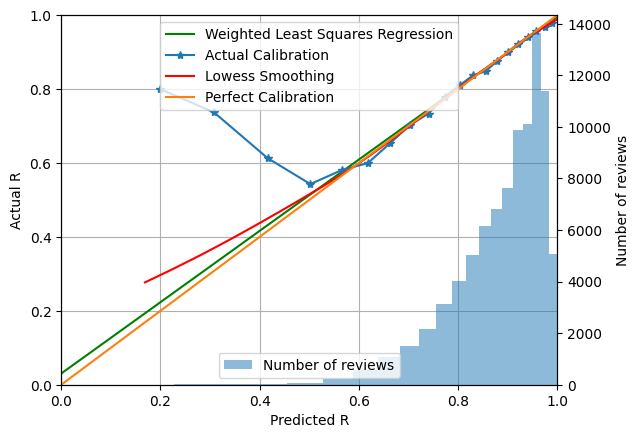

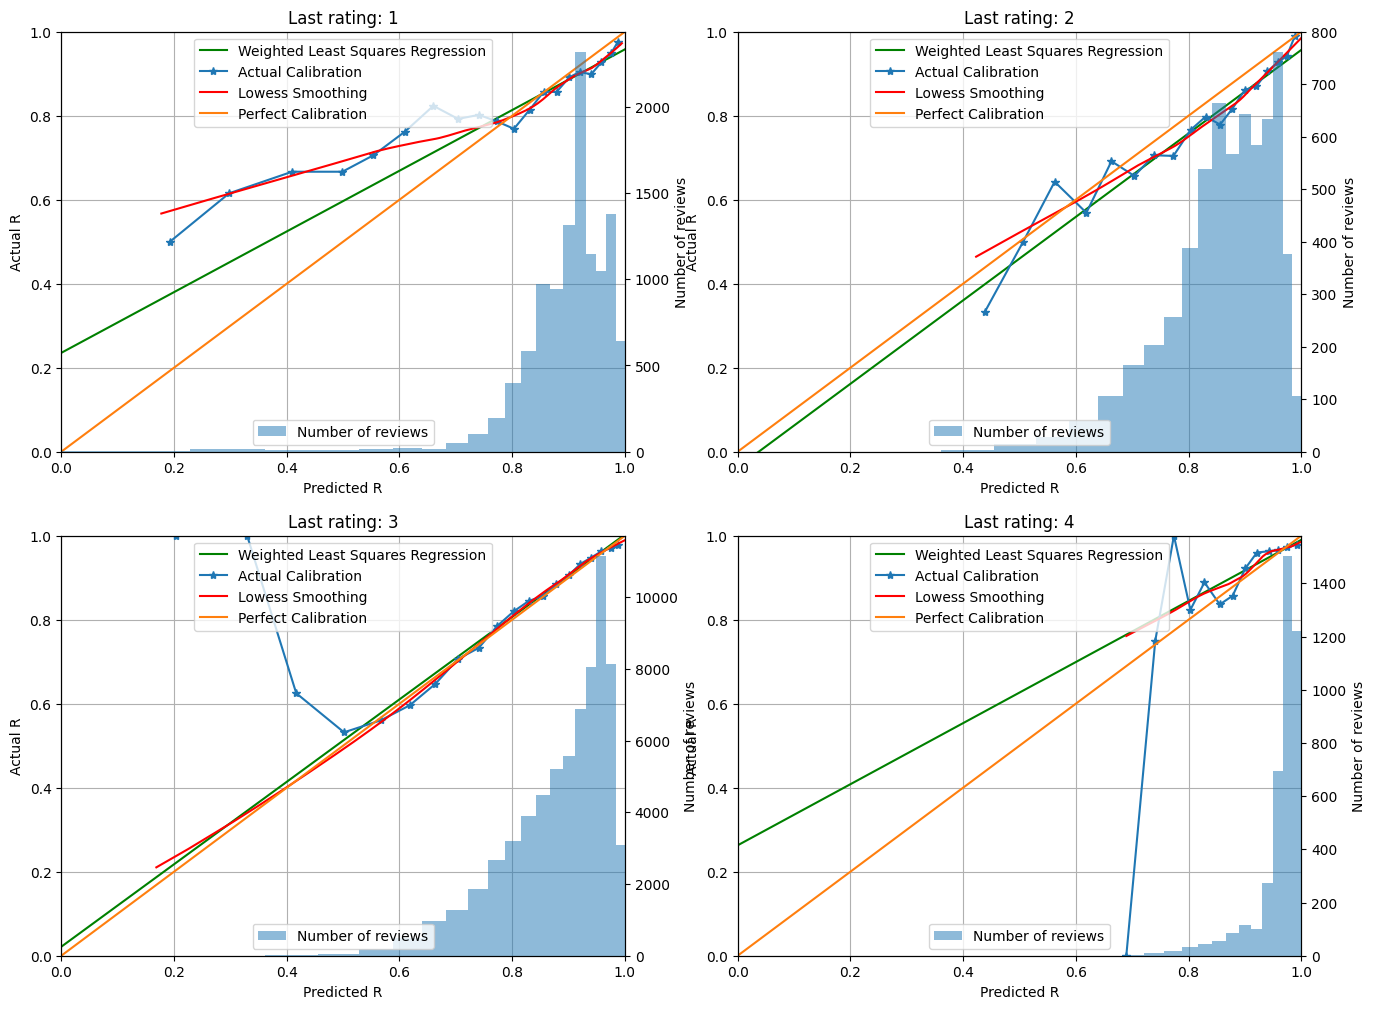

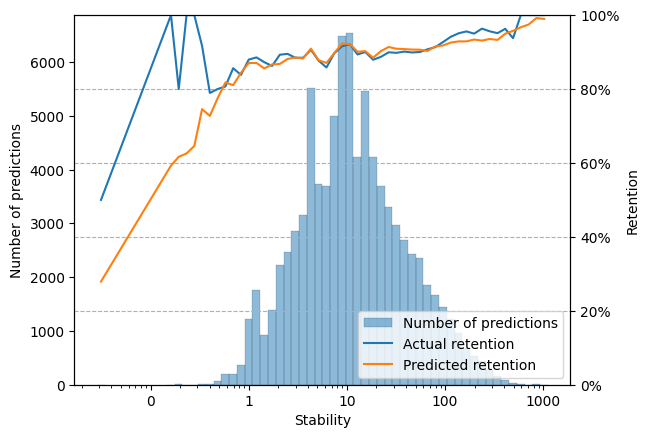

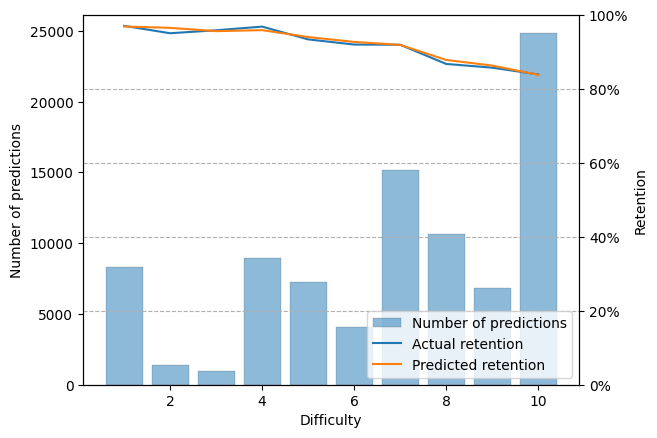

In [8]:
from fsrs_optimizer import Collection, power_forgetting_curve
from sklearn.metrics import log_loss

my_collection = Collection(w1)
stabilities, difficulties = my_collection.batch_predict(df1)
df1["stability"] = stabilities
df1["difficulty"] = difficulties
df1["p"] = power_forgetting_curve(df1["delta_t"], df1["stability"])

my_collection = Collection(w2)
stabilities, difficulties = my_collection.batch_predict(df2)
df2["stability"] = stabilities
df2["difficulty"] = difficulties
df2["p"] = power_forgetting_curve(df2["delta_t"], df2["stability"])

df_join = pd.concat([df1, df2])
print(f"log loss: {log_loss(df_join['y'], df_join['p']):.4f}")
optimizer.calibration_graph(df_join)

log loss: 0.3011
RMSE(bins): 0.0216
R-squared: 0.9780
MAE: 0.0050
ICI: 0.0029
E50: 0.0022
E90: 0.0073
EMax: 0.1403
[0.02468137 0.97244104]

Last rating: 1
RMSE(bins): 0.0398
R-squared: 0.5867
MAE: 0.0221
ICI: 0.0208
E50: 0.0191
E90: 0.0263
EMax: 0.4478
[0.23426706 0.72339627]

Last rating: 2
RMSE(bins): 0.0646
R-squared: 0.6692
MAE: 0.0435
ICI: 0.0410
E50: 0.0431
E90: 0.0536
EMax: 0.0545
[-0.00351808  0.95646853]

Last rating: 3
RMSE(bins): 0.0246
R-squared: 0.9675
MAE: 0.0100
ICI: 0.0077
E50: 0.0094
E90: 0.0106
EMax: 0.0380
[0.00765508 0.99884271]

Last rating: 4
RMSE(bins): 0.0315
R-squared: 0.6272
MAE: 0.0127
ICI: 0.0097
E50: 0.0105
E90: 0.0144
EMax: 0.0469
[0.2200489  0.77027859]


({'R-squared': 0.9780112033030071,
  'MAE': 0.004983597076556528,
  'ICI': 0.0029080049234740065,
  'rmse': 0.02163733194545173},
 (<Figure size 640x480 with 2 Axes>,
  <Figure size 1600x1200 with 8 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>))

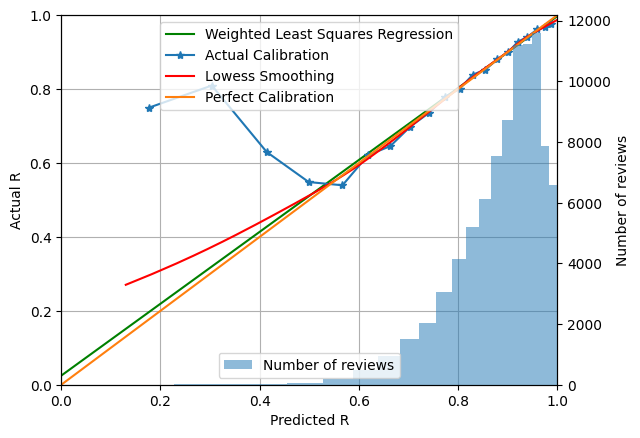

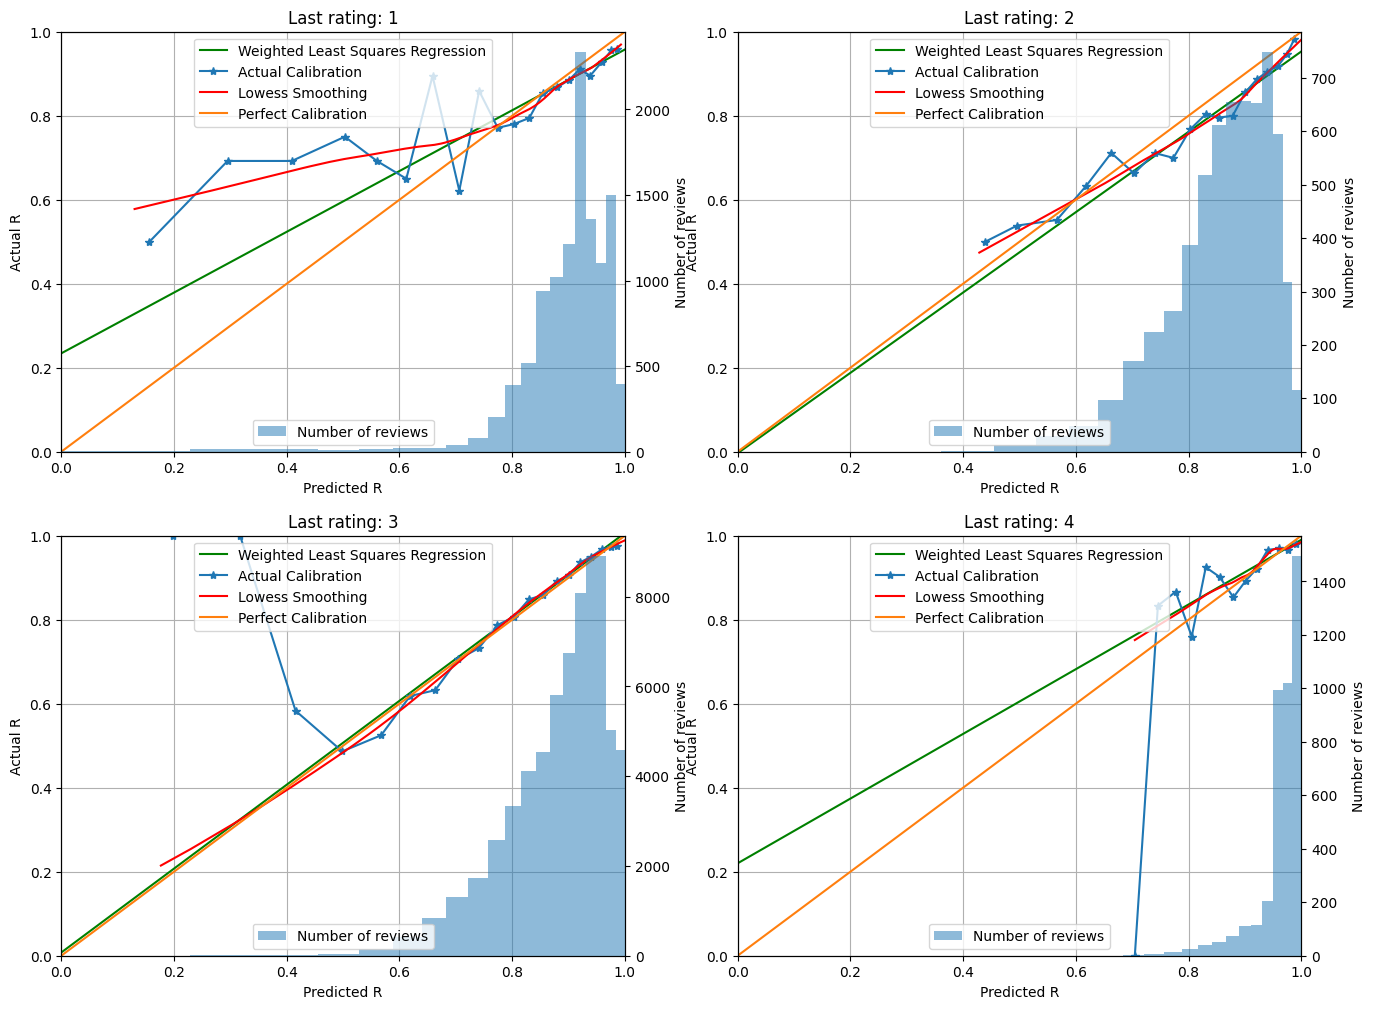

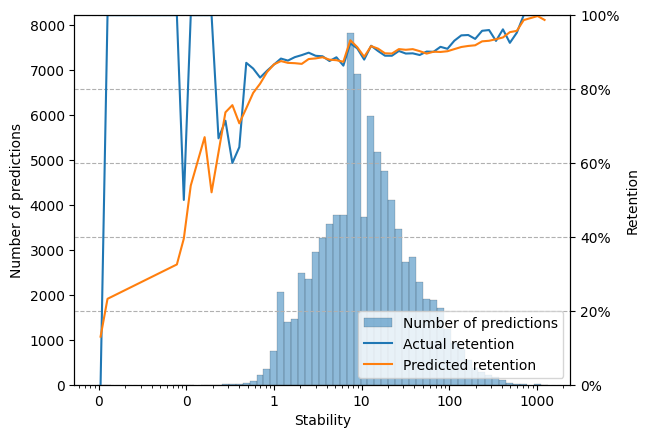

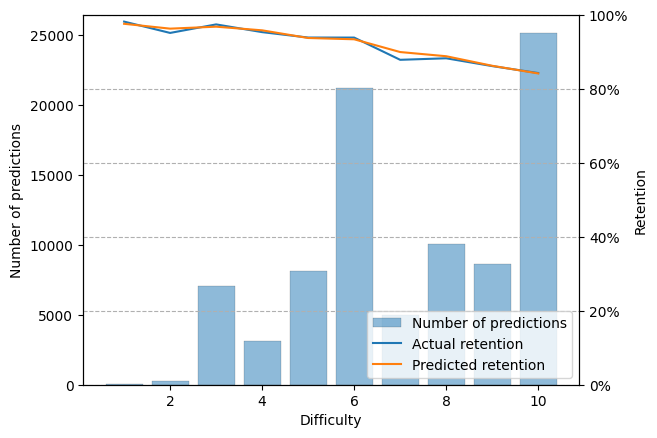

In [9]:
my_collection = Collection(w3)
stabilities, difficulties = my_collection.batch_predict(df3)
df3["stability"] = stabilities
df3["difficulty"] = difficulties
df3["p"] = power_forgetting_curve(df3["delta_t"], df3["stability"])
print(f"log loss: {log_loss(df3['y'], df3['p']):.4f}")
optimizer.calibration_graph(df3)